In [30]:
import os
import csv
import re
from nltk import sent_tokenize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [26]:
def normal_distribution(values: list, name_of_values: str) -> None:
    """
    
    Example usage:
    >>> normal_distribution(all_diversities, 'Diversity of generated text')
    """

    
    mean = np.nanmean(values)
    sigma = np.nanstd(values)

    num_bins = 100

    fig, ax = plt.subplots()

    #the histogram of the data
    n, bins, _ = ax.hist(values, num_bins, normed=True)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mean, sigma)
    ax.plot(bins, y, linewidth=2, color='r')
    ax.set_xlabel(name_of_values)
#     ax.set_xlim([0.5,1])
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of distribution: $\mu={}$, $\sigma={}$'.format(
        round(mean, 3), round(sigma, 3)))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                          np.exp(- (bins - mean)**2 / (2 * sigma**2)),
    #                    linewidth=2, color='r')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

In [9]:
def get_sentences(filepath):
    """ Return sentences given a text file.
    """
    with open(filepath, mode='r', encoding="ISO-8859-1") as f:
        data = f.read()
    sentences = sent_tokenize(data)
    return sentences

In [18]:
def create_labelled_text(text, novs, divs, label):
    """ Create labelled text file with corresponding novelty and diversity values
    """
    text_dict = dict()

    for ix, t in enumerate(text):
        text_dict[ix] = (t, novs[ix], divs[ix], label)
        
    return text_dict


def write_to_csv(text_dict, filename):
    """
    """
    # real labelled as 1, fake labelled as 0
    fieldnames = ["index", "text", "novelty", "diversity", "label"]
    with open(file=filename, mode='w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        data = [dict(zip(fieldnames, [k, values[0], values[1], values[2], values[3]]))
                for k, values in text_dict.items()]
        writer.writerows(data)

# bad function name
def create_labelled_dictionary(text, novelties, diversities, label):
    """ Create labelled text file with no novelty or diversity values
    """
    text_dict = dict()

    for ix, t in enumerate(text):
        text_dict[ix] = (t, novelties[ix], diversities[ix], label)

    return text_dict


def write_to_file(text_dict, filename):
    """
    """
    # real labelled as 1, fake labelled as 0
    fieldnames = ["index", "text", "novelty", "diversity", "label"]
    with open(file=filename, mode='w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        data = [dict(zip(fieldnames, [k, values[0], values[1], values[2], values[3]]))
                for k, values in text_dict.items()]
        writer.writerows(data)


def read_list(filename: str) -> list:
    """ Extract the diversity or novelty list from txt file
    
        Example usage:
        >>> read_list('jaccard_diversities_real.txt')
    """
    with open(file=filename, mode='r', encoding="ISO-8859-1") as f:
        result_list = list()
        data = f.read().split(',\n')
        for line in data:
            result_list.append(float(re.findall("\d+\.\d+", line)[0]))
            
    return result_list

In [19]:
DATA_FILE = "../data/emnlp_news.txt"
TEST_FILE = "../data/test_emnlp.txt"
GENERATED_FILE = "../data/generated_text2.txt"

# save these sentences and novelties to save computation time
# corpus_sentences = get_sentences(DATA_FILE)  # 304222 sentences
real_sentences = get_sentences(TEST_FILE) # 10785 sentences
fake_sentences = get_sentences(GENERATED_FILE)  # 11055 sentences

unscaled_fake_diversities = read_list('levenshtein_diversities_fake2.txt')
unscaled_fake_novelties = read_list('levenshtein_novelties_fake2.txt')

unscaled_real_novelties = read_list('levenshtein_novelties_real.txt')
unscaled_real_diversities = read_list('levenshtein_diversities_real.txt')

print(len(fake_sentences), len(unscaled_fake_diversities), len(unscaled_fake_novelties))

print(len(real_sentences), len(unscaled_real_diversities), len(unscaled_real_novelties))


real_text = get_sentences(DATA_FILE)
fake_text = get_sentences(GENERATED_FILE)

real_dict = create_labelled_dictionary(real_sentences, unscaled_real_novelties, unscaled_real_diversities, 1)
write_to_file(real_dict, filename='labelled_real_metrics_levenshtein.csv')

# label fake text with 0
fake_dict = create_labelled_dictionary(fake_sentences, unscaled_fake_novelties, unscaled_fake_diversities, 0)
write_to_file(fake_dict, filename='labelled_fake_metrics_levenshtein.csv')

11055 11055 11055
10785 10785 10785


In [24]:
def scale_back(distances, real_sentences, fake_sentences):
    """
    Want to scale back levenshtein distance
    """
    scaled_result = list()
    for distance, real_sentence, fake_sentence in zip(distances, real_sentences, fake_sentences):
#         scaled_result.append(distance * max(len(real_sentence), len(fake_sentence)) / max(distances))
        scaled_result.append(distance / max(distances))

    
    return scaled_result

In [25]:
fake_diversities = scale_back(unscaled_fake_diversities, real_sentences, fake_sentences)
fake_novelties = scale_back(unscaled_fake_novelties, real_sentences, fake_sentences)

real_novelties = scale_back(unscaled_real_novelties, real_sentences, fake_sentences)
real_diversities = scale_back(unscaled_real_diversities, real_sentences, fake_sentences)

print(unscaled_fake_diversities[:10], fake_diversities[:10])

[0.8629441624365483, 0.8584474885844748, 0.875, 0.8337028824833703, 0.8577777777777778, 0.8527918781725888, 0.86, 0.8685714285714285, 0.864321608040201, 0.8542713567839196] [0.8961343225302616, 0.8914646996838776, 0.9086538461538461, 0.8657683779634999, 0.8907692307692306, 0.8855915657946114, 0.893076923076923, 0.9019780219780219, 0.8975647468109779, 0.887127947429455]


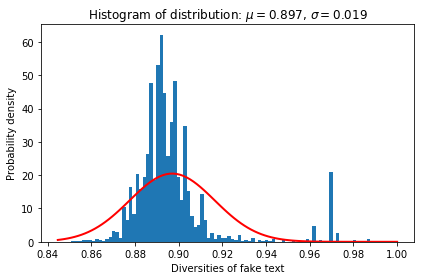

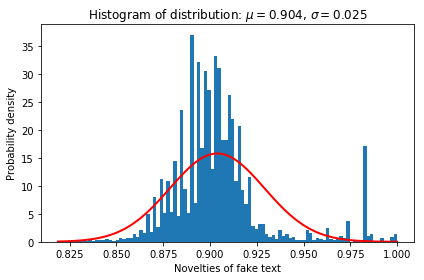

In [31]:
normal_distribution(fake_diversities, 'Diversities of fake text')
normal_distribution(fake_novelties, 'Novelties of fake text')

In [ ]:
real_dict = create_labelled_dictionary(real_sentences, real_novelties, real_diversities, 1)
write_to_file(real_dict, filename='scaled_labelled_real_metrics_levenshtein.csv')

# label fake text with 0
fake_dict = create_labelled_dictionary(fake_sentences, fake_novelties, fake_diversities, 0)
write_to_file(fake_dict, filename='scaledlabelled_fake_metrics_levenshtein.csv')